In [1]:
import os
import json

In [2]:
from kg.query import query_kg, query_kg_endpoint, get_triples_from_response
import matplotlib.pyplot as plt
import networkx as nx

from utils.kg_functions import load_json, extract_ids_with_prefix, convert_QID_yagoID
from utils.kg_functions import combine_lists_from_dict, get_yago_direct_neighbors, sparql_to_triples_with_main_entity
from utils.kg_functions import parallel_process_nodes, extract_ids_with_prefix, parallel_convert_QID_yagoID

from utils.subgraph_functions import create_graph_from_triples, build_minimal_subgraph_Steiner, largest_connected_subgraph
from utils.subgraph_functions import plot_graph_with_simplified_labels, get_interesting_entities, filter_triples_by_predicates

In [3]:
def read_and_merge_json(directory_path):
    """
    Reads all JSON files in the given directory and merges them into a single dictionary.

    Args:
        directory_path (str): Path to the directory containing JSON files.

    Returns:
        dict: A dictionary containing merged content from all JSON files.
    """
    merged_data = {}
    
    files_list = os.listdir(directory_path)
    print(files_list)
    print(f"Found {len(files_list)} files in {directory_path}")

    for file_name in files_list:
        if file_name.endswith('.json'):
            file_path = os.path.join(directory_path, file_name)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    data = json.load(file)
                    if isinstance(data, dict):
                        merged_data.update(data)
                    else:
                        raise ValueError(f"File {file_name} does not contain a JSON object.")
            except Exception as e:
                print(f"Error reading file {file_name}: {e}")

    return merged_data

def save_json_to_disk(data, output_path):
    """
    Saves the given data as a JSON file to the specified output path.

    Args:
        data (dict): Data to save as a JSON file.
        output_path (str): Path where the JSON file will be saved.

    Returns:
        None
    """
    try:
        with open(output_path, 'w', encoding='utf-8') as file:
            json.dump(data, file, indent=4, ensure_ascii=False)
        print(f"Merged JSON data saved to {output_path}")
    except Exception as e:
        print(f"Error saving JSON data to {output_path}: {e}")




In [4]:
# Example usage:
directory = "/home/ubuntu/preetam_experiments/outputs/test"
merged_data = read_and_merge_json(directory)


['intermediate_results_intermediate_110000_results.json', 'intermediate_results_intermediate_120000_results.json', 'intermediate_results_intermediate_100000_results.json', 'intermediate_results_intermediate_20000_results.json', 'intermediate_results_intermediate_160000_results.json', 'intermediate_results_intermediate_150000_results.json', 'intermediate_results_intermediate_130000_results.json', 'intermediate', 'intermediate_results_intermediate_50000_results.json', 'intermediate_results_intermediate_40000_results.json', 'intermediate_results_intermediate_30000_results.json', 'intermediate_results_intermediate_10000_results.json', 'intermediate_results_intermediate_140000_results.json', 'intermediate_results_intermediate_90000_results.json', 'final_results_results.json', 'intermediate_results_intermediate_80000_results.json', 'intermediate_results_intermediate_60000_results.json', 'intermediate_results_intermediate_70000_results.json']
Found 18 files in /home/ubuntu/preetam_experiments

In [5]:
len(merged_data)
keys = list(merged_data.keys())

In [6]:
merged_data[keys[0]]

{'subgraph_Steiner': [['http://yago-knowledge.org/resource/Derick_Brownell',
   'http://schema.org/memberOf',
   'http://yago-knowledge.org/resource/Arizona_Thunder'],
  ['http://yago-knowledge.org/resource/Derick_Brownell',
   'http://schema.org/alumniOf',
   'http://yago-knowledge.org/resource/Santa_Clara_University'],
  ['http://yago-knowledge.org/resource/Derick_Brownell',
   'http://schema.org/memberOf',
   'http://yago-knowledge.org/resource/Charleston_Battery'],
  ['http://yago-knowledge.org/resource/Derick_Brownell',
   'http://schema.org/memberOf',
   'http://yago-knowledge.org/resource/California_Jaguars']],
 'subgraph_Steiner_length': 4,
 'subgraph_Steiner_largest_connected': [['http://yago-knowledge.org/resource/Derick_Brownell',
   'http://schema.org/memberOf',
   'http://yago-knowledge.org/resource/Arizona_Thunder'],
  ['http://yago-knowledge.org/resource/Derick_Brownell',
   'http://schema.org/alumniOf',
   'http://yago-knowledge.org/resource/Santa_Clara_University'],
  

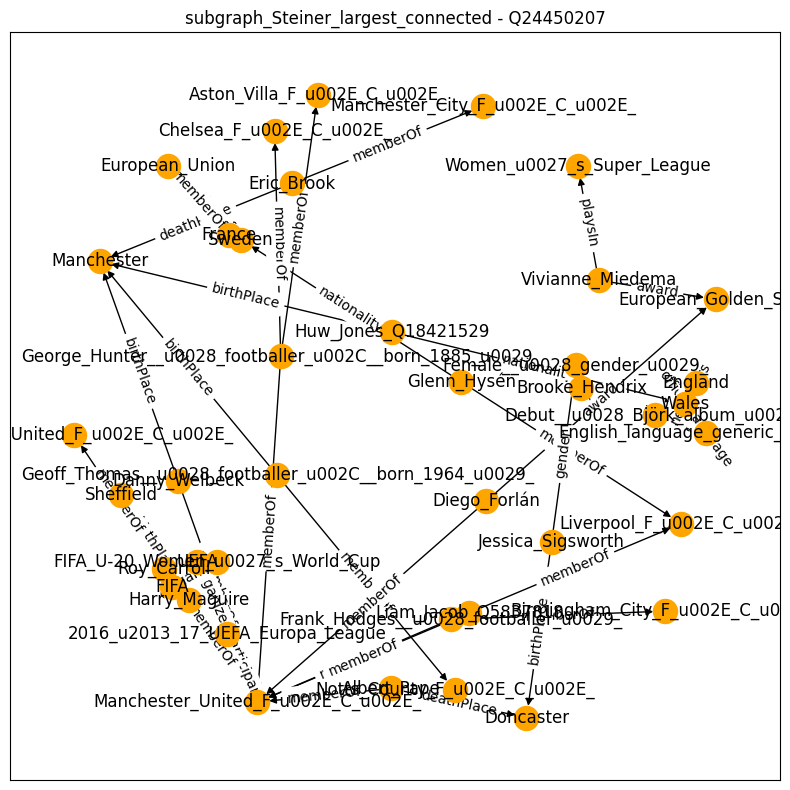

subgraph_Steiner_largest_connected - Q24450207
{'subgraph_Steiner': [['http://yago-knowledge.org/resource/Debut__u0028_Björk_album_u0029_', 'http://schema.org/inLanguage', 'http://yago-knowledge.org/resource/English_language_generic_instance'], ['http://yago-knowledge.org/resource/Huw_Jones_Q18421529', 'http://schema.org/birthPlace', 'http://yago-knowledge.org/resource/Manchester'], ['http://yago-knowledge.org/resource/Huw_Jones_Q18421529', 'http://schema.org/nationality', 'http://yago-knowledge.org/resource/Wales'], ['http://yago-knowledge.org/resource/Frank_Hodges__u0028_footballer_u0029_', 'http://schema.org/memberOf', 'http://yago-knowledge.org/resource/Birmingham_City_F_u002E_C_u002E_'], ['http://yago-knowledge.org/resource/Frank_Hodges__u0028_footballer_u0029_', 'http://schema.org/memberOf', 'http://yago-knowledge.org/resource/Manchester_United_F_u002E_C_u002E_'], ['http://yago-knowledge.org/resource/Geoff_Thomas__u0028_footballer_u002C__born_1964_u0029_', 'http://schema.org/birt

In [7]:
idx = 10240
graph = create_graph_from_triples(merged_data[keys[idx]]['subgraph_Steiner_largest_connected'])
plot_graph_with_simplified_labels(graph, f'subgraph_Steiner_largest_connected - {keys[idx]}')
print(f'subgraph_Steiner_largest_connected - {keys[idx]}')
print(merged_data[keys[idx]])
print(f"Length: {len(merged_data[keys[idx]]['subgraph_Steiner_largest_connected'])}, Length full: {len(merged_data[keys[idx]]['subgraph_Steiner'])}")

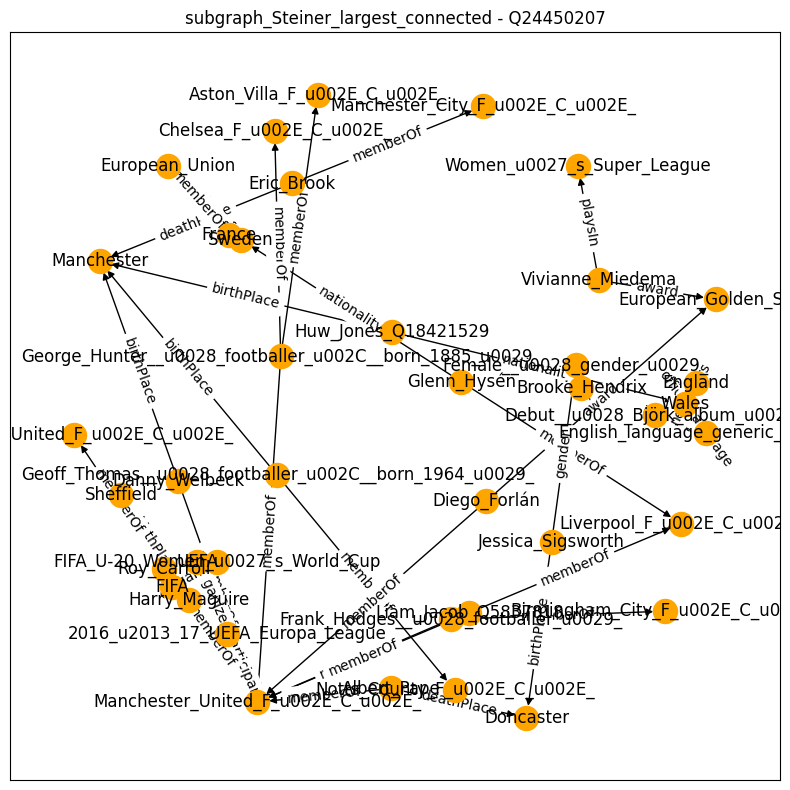

In [8]:
plot_graph_with_simplified_labels(graph, f'subgraph_Steiner_largest_connected - {keys[idx]}')

In [9]:
keys[0]

'Q5262570'

In [10]:
type(merged_data[keys[0]]['subgraph_Steiner_largest_connected'])

list

In [11]:
# save_json_to_disk(merged_data, "path/to/output/combined.json")

In [12]:
import pandas as pd

df = pd.DataFrame.from_dict(merged_data, orient='index')

In [13]:
df

,subgraph_Steiner,subgraph_Steiner_length,subgraph_Steiner_largest_connected,subgraph_Steiner_largest_connected_length
Q5262570,[[http://yago-knowledge.org/resource/Derick_Br...,4,[[http://yago-knowledge.org/resource/Derick_Br...,4
Q5280937,[[http://yago-knowledge.org/resource/So__u0028...,3,[[http://yago-knowledge.org/resource/So__u0028...,3
Q1200727,[[http://yago-knowledge.org/resource/Sara_Hall...,6,[[http://yago-knowledge.org/resource/Sara_Hall...,6
Q5183240,[[http://yago-knowledge.org/resource/The_Vendo...,14,[[http://yago-knowledge.org/resource/The_Vendo...,4
Q5213228,[[http://yago-knowledge.org/resource/Scottie_P...,16,[[http://yago-knowledge.org/resource/Scottie_P...,16
...,...,...,...,...
Q8024305,[[http://yago-knowledge.org/resource/Andrei_Ka...,31,[[http://yago-knowledge.org/resource/Long_Isla...,26
Q8012029,[[http://yago-knowledge.org/resource/Clay_Hart...,66,[[http://yago-knowledge.org/resource/Clay_Hart...,61
Q7951907,[[http://yago-knowledge.org/resource/Chris_Pay...,79,[[http://yago-knowledge.org/resource/Chris_Pay...,79
Q1192865,[[http://yago-knowledge.org/resource/Emperor_T...,37,[[http://yago-knowledge.org/resource/Emperor_T...,23


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def perform_graph_eda(node_counts):
    """
    Performs exploratory data analysis (EDA) on a list of integers representing
    the number of nodes in graphs.

    Args:
        node_counts (list[int]): List of integers representing the number of nodes in graphs.

    Returns:
        None
    """
    if not node_counts:
        print("The node_counts list is empty. No analysis performed.")
        return

    # Convert to numpy array for easier analysis
    node_counts = np.array(node_counts)

    # Basic statistics
    print("Basic Statistics:")
    print(f"- Total graphs: {len(node_counts)}")
    print(f"- Mean nodes: {np.mean(node_counts):.2f}")
    print(f"- Median nodes: {np.median(node_counts):.2f}")
    print(f"- Min nodes: {np.min(node_counts)}")
    print(f"- Max nodes: {np.max(node_counts)}")
    print(f"- Standard deviation: {np.std(node_counts):.2f}")

    # Visualizations

    # Histogram
    plt.figure(figsize=(10, 6))
    plt.hist(node_counts, bins=100, color='skyblue', edgecolor='black')
    plt.title("Distribution of Node Counts")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=node_counts, color='lightgreen')
    plt.title("Boxplot of Node Counts")
    plt.xlabel("Number of Nodes")
    plt.show()

    # KDE Plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(node_counts, fill=True, color='purple', alpha=0.6)
    plt.title("Density Plot of Node Counts")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Density")
    plt.show()

    # Insights
    print("Insights:")
    if np.mean(node_counts) > np.median(node_counts):
        print("- The distribution is likely right-skewed (positively skewed).")
    elif np.mean(node_counts) < np.median(node_counts):
        print("- The distribution is likely left-skewed (negatively skewed).")
    else:
        print("- The distribution is symmetric.")

    print("- Consider graphs with extremely high or low node counts as potential outliers.")


Basic Statistics:
- Total graphs: 135433
- Mean nodes: 19.63
- Median nodes: 10.00
- Min nodes: 1
- Max nodes: 985
- Standard deviation: 30.10


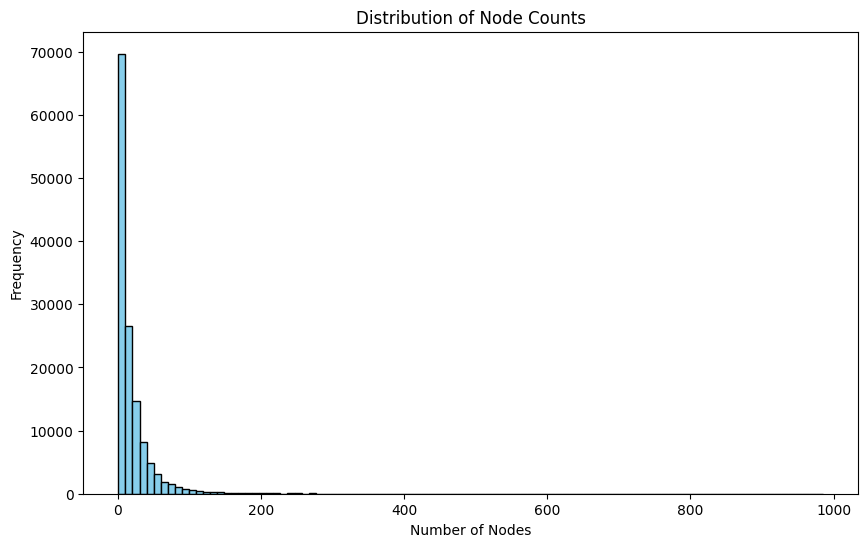

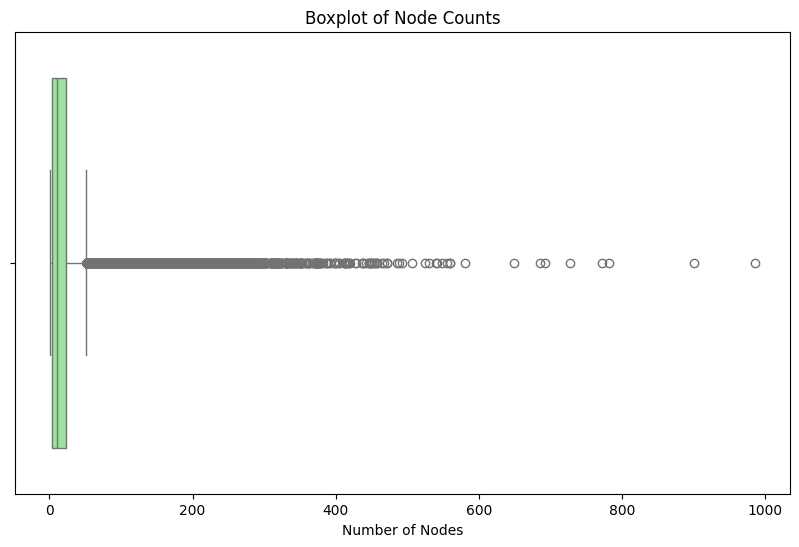

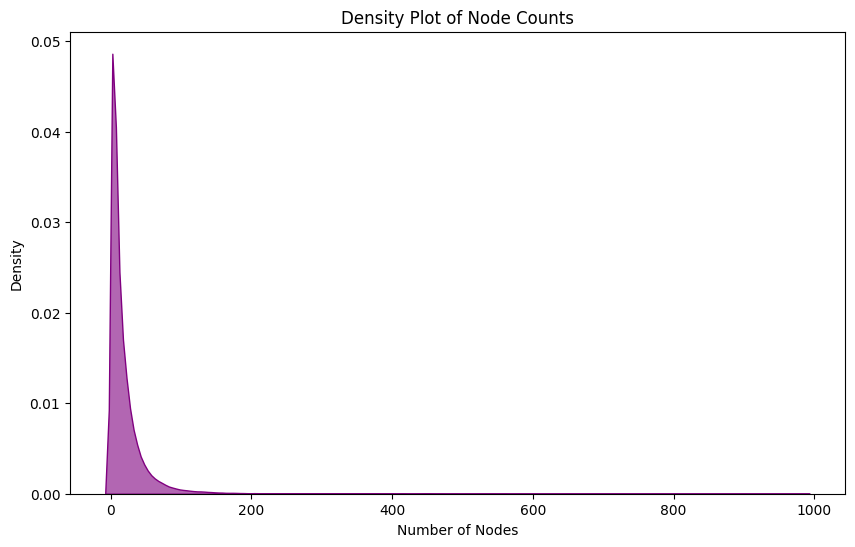

Insights:
- The distribution is likely right-skewed (positively skewed).
- Consider graphs with extremely high or low node counts as potential outliers.


In [23]:

# Example usage
node_counts = df['subgraph_Steiner_largest_connected_length'].tolist()
perform_graph_eda(node_counts)
